In [30]:
import pandas as pd
import numpy as np
from numpy import array
import os

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'game_overview.csv',
 'train.csv',
 'Word2Vec-Keras.ipynb']

In [3]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('game_overview.csv')

In [4]:
df1.head(1)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1


In [5]:
df=df1['user_review'].tolist()

In [6]:
target=df1['user_suggestion']

In [7]:
df[0]

"I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door."

In [8]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: user_suggestion, dtype: int64

### step-1

In [9]:
token=Tokenizer()
token.fit_on_texts(df)

In [10]:
token

In [11]:
# unique words with index
token.index_word

{1: 'the',
 2: 'to',
 3: 'and',
 4: 'a',
 5: 'game',
 6: 'you',
 7: 'i',
 8: 'of',
 9: 'is',
 10: 'it',
 11: 'this',
 12: 'in',
 13: 'for',
 14: 'that',
 15: 'but',
 16: 'with',
 17: 'are',
 18: 'have',
 19: 'on',
 20: 'not',
 21: 'if',
 22: 'be',
 23: 'can',
 24: 'as',
 25: 'like',
 26: 'play',
 27: 'so',
 28: 'get',
 29: 'your',
 30: 'or',
 31: 'just',
 32: 'all',
 33: 'they',
 34: 'my',
 35: "it's",
 36: 'more',
 37: 'at',
 38: 'was',
 39: 'good',
 40: 'will',
 41: 'there',
 42: 'time',
 43: 'from',
 44: 'some',
 45: 'fun',
 46: 'one',
 47: 'has',
 48: 'early',
 49: 'access',
 50: 'no',
 51: 'very',
 52: 'its',
 53: 'out',
 54: 'even',
 55: 'me',
 56: 'do',
 57: 'only',
 58: 'really',
 59: 'when',
 60: 'up',
 61: 'an',
 62: 'free',
 63: 'games',
 64: 'what',
 65: "don't",
 66: 'other',
 67: 'about',
 68: 'which',
 69: 'would',
 70: 'because',
 71: 'now',
 72: 'nope',
 73: 'playing',
 74: 'new',
 75: 'much',
 76: 'then',
 77: 'people',
 78: 'by',
 79: 'money',
 80: 'than',
 81: 'play

In [12]:
vocab_len=len(token.index_word)+1
vocab_len

59102

### step-2

In [13]:
# till here we just tokenized(in general we calculated index number words present in our data)
# Now assign those words in our actual data(which in the form of list)
# Here our token is trained/Stored with Index Number data

encoded_text=token.texts_to_sequences(df)

In [14]:
print(encoded_text[1])

[125, 5, 36, 98, 80, 7443, 24494, 902, 441, 91, 17664, 259, 114, 2, 26, 4, 24495, 789, 2961, 403, 1739, 24, 502, 45, 1100, 2352, 227, 7, 2015, 2, 765, 14, 52, 1739, 24, 502, 259, 28, 36, 2961, 17665, 12, 29, 14418, 42, 2853, 21, 150, 828, 485, 564, 2961, 17665, 6, 557, 1236, 10, 286]


* Now the problem is Our Deep Learning Model Accepts only all values should in Same len
* But we know every sentence have different lengths 
* For that we do padding
* 
* this will make where we have <120 ------>add '0's to equal 120
                              >120 ------>cut upto 120


In [15]:
#padding: String, 'pre' or 'post': pad either before or after each sequence.

max_len=120
x=pad_sequences(encoded_text,maxlen=max_len,padding='post')  # add padding at end of sentence

In [16]:
x.shape # this is ready to feed to keras

(17494, 120)

### Model Buliding

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,target,test_size=0.3,random_state=36,stratify=target)

In [18]:
vec_size=300 # because this Standrad size for word2vec

model=Sequential()
model.add(Embedding(input_dim=vocab_len,   output_dim=vec_size,   input_length=max_len))

model.add(Conv1D(64,8,activation='relu',))
model.add(MaxPooling1D(2,2))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(xtrain,ytrain,epochs=2,validation_data=(xtest,ytest),verbose=1)

Train on 12245 samples, validate on 5249 samples
Epoch 1/2
12245/12245 [==============================] - 161s 13ms/sample - loss: 0.5624 - accuracy: 0.6913 - val_loss: 0.4653 - val_accuracy: 0.7906
Epoch 2/2
12245/12245 [==============================] - 161s 13ms/sample - loss: 0.3259 - accuracy: 0.8617 - val_loss: 0.4395 - val_accuracy: 0.8114


In [22]:
test=['This game is super']

In [26]:
def encode(x):
    x=token.texts_to_sequences(x)
    x=pad_sequences(x,maxlen=max_len,padding='post')
    return x

In [28]:
model.predict_classes(encode(test))

array([[1]])

In [29]:
history.history

{'loss': [0.5624227009874891, 0.32586057579434613],
 'accuracy': [0.6913026, 0.8616578],
 'val_loss': [0.4652763645997341, 0.43948138641343615],
 'val_accuracy': [0.79062676, 0.81139266]}

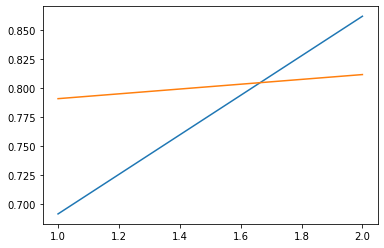

In [42]:
epoch_range=range(1,3)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])